**Necessary Imports for Data Processing and Model Implementation**

In [1]:
# Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

**Heading: Loading and Preparing the Dataset**

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ["ID", "Diagnosis"] + [f"feature_{i}" for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)

**Shape fo the dataset**

In [3]:
print("Dataset Shape:", data.shape)

Dataset Shape: (569, 32)


**Displaying the First Few Rows of the Dataset**

In [4]:
data.head()

,ID,Diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Displaying the Last Few Rows of the Dataset**

In [5]:
data.tail()

,ID,Diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


**Displaying Dataset Information**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          569 non-null    int64  
 1   Diagnosis   569 non-null    object 
 2   feature_1   569 non-null    float64
 3   feature_2   569 non-null    float64
 4   feature_3   569 non-null    float64
 5   feature_4   569 non-null    float64
 6   feature_5   569 non-null    float64
 7   feature_6   569 non-null    float64
 8   feature_7   569 non-null    float64
 9   feature_8   569 non-null    float64
 10  feature_9   569 non-null    float64
 11  feature_10  569 non-null    float64
 12  feature_11  569 non-null    float64
 13  feature_12  569 non-null    float64
 14  feature_13  569 non-null    float64
 15  feature_14  569 non-null    float64
 16  feature_15  569 non-null    float64
 17  feature_16  569 non-null    float64
 18  feature_17  569 non-null    float64
 19  feature_18  569 non-null    f

**Summary Statistics of the Dataset**

In [38]:
data.describe()

,Diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Dropping Unnecessary Column**

In [8]:
data = data.drop("ID", axis=1)

**Categorical and Numerical Column Counts**

In [39]:
# Categorical column count for 'Diagnosis'
categorical_count = data["Diagnosis"].value_counts()

# Counting the number of categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object']).columns  # Categorical columns are of 'object' type
numerical_columns = data.select_dtypes(include=[np.number]).columns  # Numerical columns are of 'number' type

# Displaying the counts for each
print("\nCategorical Label Counts (Diagnosis):")
print(categorical_count)

print(f"\nTotal Categorical Columns: {len(categorical_columns)}")
print(f"Total Numerical Columns: {len(numerical_columns)}")

# You can also print the actual columns
print("\nNumerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)



Categorical Label Counts (Diagnosis):
Diagnosis
0    357
1    212
Name: count, dtype: int64

Total Categorical Columns: 0
Total Numerical Columns: 31

Numerical Columns:
Index(['Diagnosis', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30'],
      dtype='object')

Categorical Columns:
Index([], dtype='object')


**Label Encoding of the "Diagnosis" Column**

In [10]:
label_encoder = LabelEncoder()
data["Diagnosis"] = label_encoder.fit_transform(data["Diagnosis"])

**Feature Scaling Using StandardScaler**

In [11]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop("Diagnosis", axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=numerical_columns)
data_scaled["Diagnosis"] = data["Diagnosis"]

**Outlier Detection for Individual Features**

In [19]:
# Outlier Detection for Individual Features
from scipy.stats import zscore

# Calculate Z-scores directly on the DataFrame's numerical columns
z_scores = data_scaled[numerical_columns].apply(zscore)

# Initialize dictionaries to store outlier count and percentage for each feature
outlier_counts = {}
outlier_percentages = {}

# Loop through each feature to calculate outliers individually
for feature in numerical_columns:
    feature_outliers = np.sum(z_scores[feature] > 3)  # Count of outliers in this feature
    outlier_percentage = (feature_outliers / data_scaled.shape[0]) * 100  # Percentage of outliers

    # Store in dictionaries
    outlier_counts[feature] = feature_outliers
    outlier_percentages[feature] = outlier_percentage

    print(f"Feature: {feature}")
    print(f"Outlier Count: {feature_outliers}")
    print(f"Outlier Percentage: {outlier_percentage:.2f}%\n")

# Print summaries for all features
print("Outlier Counts by Feature:", outlier_counts)



Feature: Diagnosis
Outlier Count: 0
Outlier Percentage: 0.00%

Feature: feature_1
Outlier Count: 5
Outlier Percentage: 0.88%

Feature: feature_2
Outlier Count: 4
Outlier Percentage: 0.70%

Feature: feature_3
Outlier Count: 7
Outlier Percentage: 1.23%

Feature: feature_4
Outlier Count: 8
Outlier Percentage: 1.41%

Feature: feature_5
Outlier Count: 4
Outlier Percentage: 0.70%

Feature: feature_6
Outlier Count: 9
Outlier Percentage: 1.58%

Feature: feature_7
Outlier Count: 9
Outlier Percentage: 1.58%

Feature: feature_8
Outlier Count: 6
Outlier Percentage: 1.05%

Feature: feature_9
Outlier Count: 5
Outlier Percentage: 0.88%

Feature: feature_10
Outlier Count: 7
Outlier Percentage: 1.23%

Feature: feature_11
Outlier Count: 7
Outlier Percentage: 1.23%

Feature: feature_12
Outlier Count: 9
Outlier Percentage: 1.58%

Feature: feature_13
Outlier Count: 8
Outlier Percentage: 1.41%

Feature: feature_14
Outlier Count: 6
Outlier Percentage: 1.05%

Feature: feature_15
Outlier Count: 7
Outlier Perce

**Boxplot for Outliers**

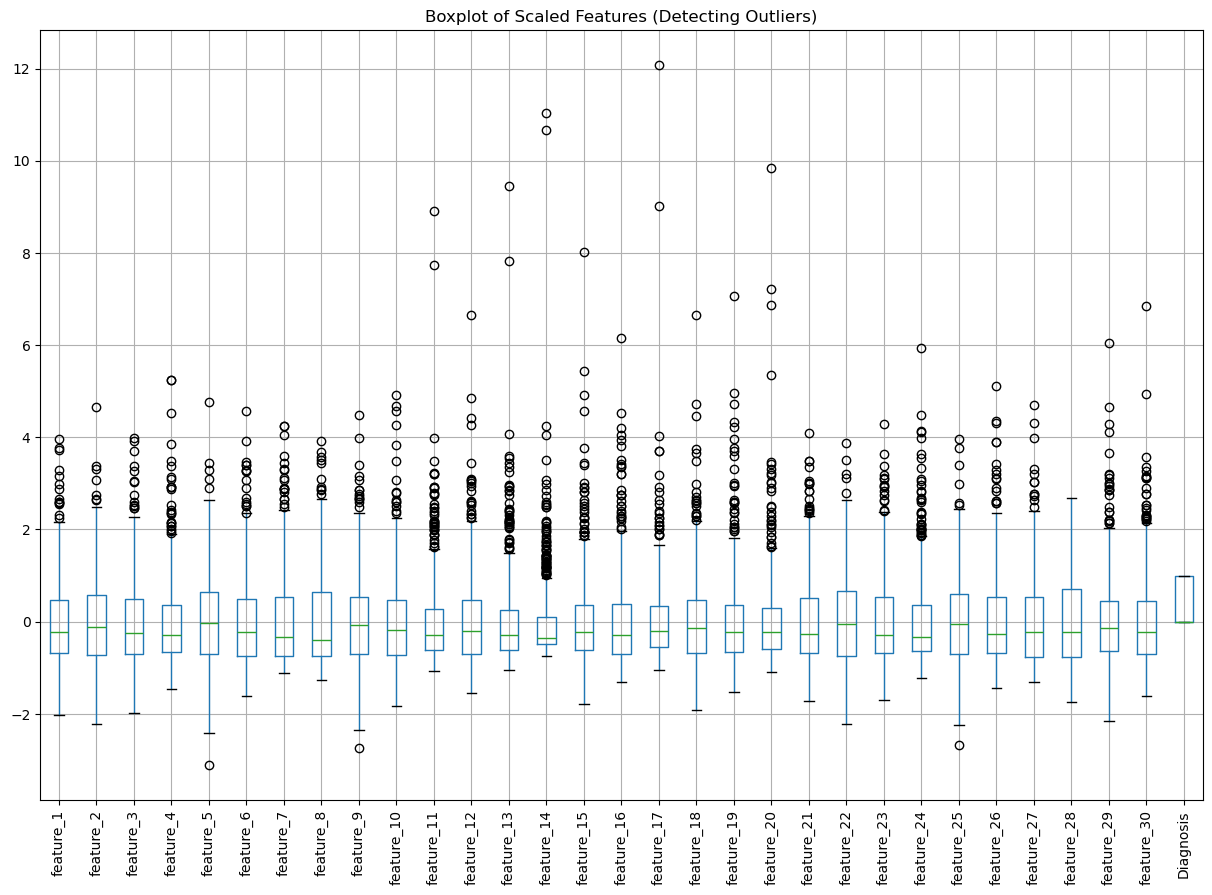

In [20]:
plt.figure(figsize=(15, 10))
data_scaled.boxplot()
plt.title("Boxplot of Scaled Features (Detecting Outliers)")
plt.xticks(rotation=90)
plt.show()

**Visualization**

**Distribution of Diagnosis Labels**

C:\Users\HP\AppData\Local\Temp\ipykernel_26008\3241594810.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=data_scaled, palette="viridis")


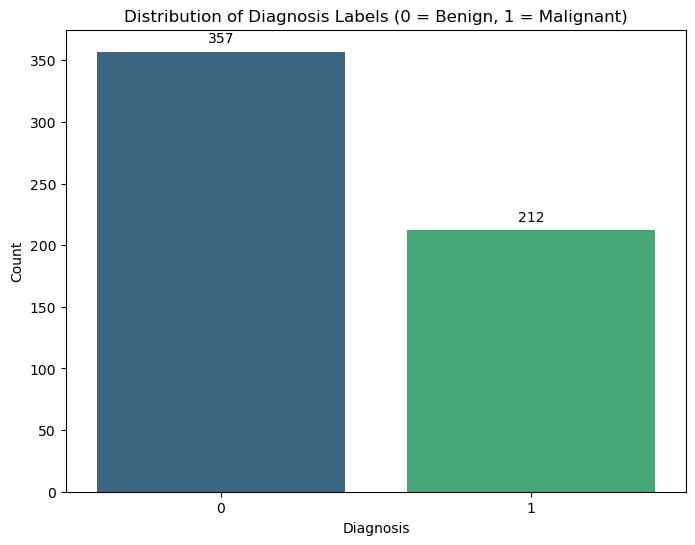

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Diagnosis', data=data_scaled, palette="viridis")
plt.title("Distribution of Diagnosis Labels (0 = Benign, 1 = Malignant)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")

# Adding count labels on top of each bar
diagnosis_counts = data_scaled['Diagnosis'].value_counts()
for index, count in enumerate(diagnosis_counts):
    plt.text(x=index, y=count + 5, s=f"{count}", ha='center', va='bottom')

plt.show()


**Correlation Heat Map**

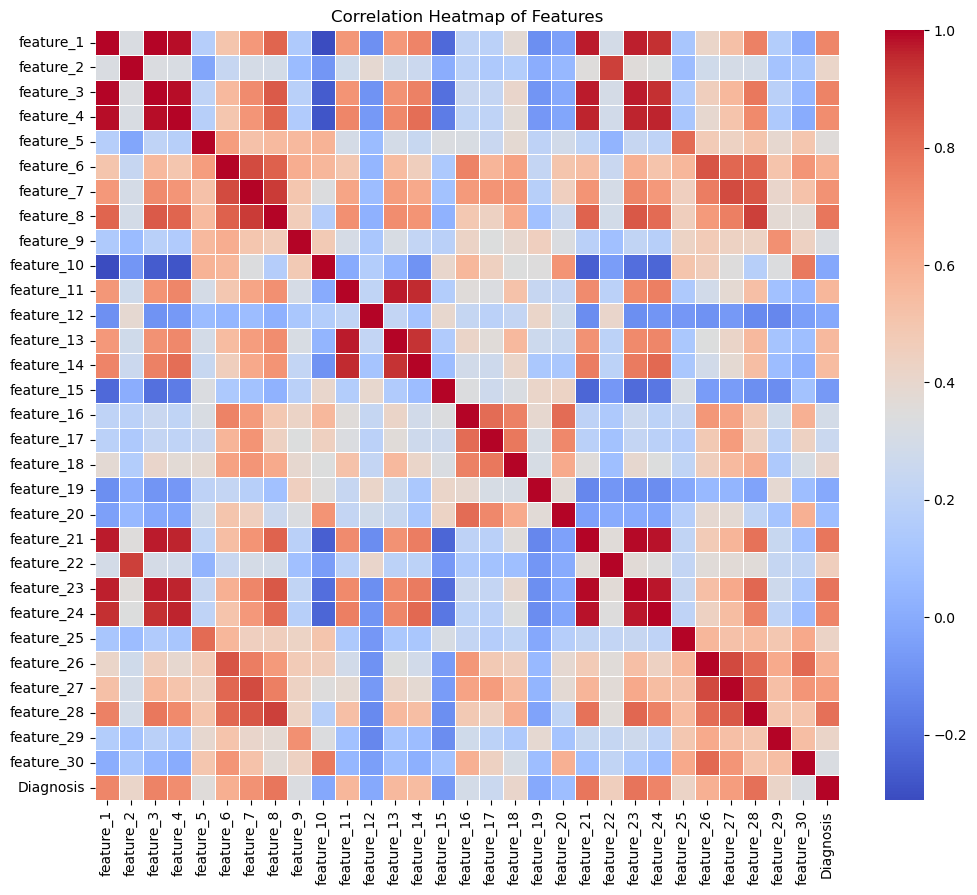

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = data_scaled.corr()

# Plotting the heatmap without annotations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)

# Display the heatmap
plt.title("Correlation Heatmap of Features")
plt.show()



In [43]:
# Identifying strongly correlated, weakly correlated features
strong_positive = []
strong_negative = []
weakly_correlated = []

# Loop through the correlation matrix to identify correlations
for feature in correlation_matrix.columns:
    for target in correlation_matrix.columns:
        if feature != target:
            correlation_value = correlation_matrix[feature][target]
            # Strong positive correlation
            if correlation_value > 0.7:
                strong_positive.append((feature, target, correlation_value))
            # Strong negative correlation
            elif correlation_value < -0.7:
                strong_negative.append((feature, target, correlation_value))
            # Weak correlation
            elif -0.3 < correlation_value < 0.3:
                weakly_correlated.append((feature, target, correlation_value))

# Printing the features with the correlation strength
print("Strong Positive Correlations (r > 0.7):")
for pair in strong_positive:
    print(f"{pair[0]} & {pair[1]}: {pair[2]:.2f}")

print("\nStrong Negative Correlations (r < -0.7):")
for pair in strong_negative:
    print(f"{pair[0]} & {pair[1]}: {pair[2]:.2f}")

print("\nWeak Correlations (-0.3 < r < 0.3):")
for pair in weakly_correlated:
    print(f"{pair[0]} & {pair[1]}: {pair[2]:.2f}")


Strong Positive Correlations (r > 0.7):
feature_1 & feature_3: 1.00
feature_1 & feature_4: 0.99
feature_1 & feature_8: 0.82
feature_1 & feature_14: 0.74
feature_1 & feature_21: 0.97
feature_1 & feature_23: 0.97
feature_1 & feature_24: 0.94
feature_1 & feature_28: 0.74
feature_1 & Diagnosis: 0.73
feature_2 & feature_22: 0.91
feature_3 & feature_1: 1.00
feature_3 & feature_4: 0.99
feature_3 & feature_7: 0.72
feature_3 & feature_8: 0.85
feature_3 & feature_14: 0.74
feature_3 & feature_21: 0.97
feature_3 & feature_23: 0.97
feature_3 & feature_24: 0.94
feature_3 & feature_28: 0.77
feature_3 & Diagnosis: 0.74
feature_4 & feature_1: 0.99
feature_4 & feature_3: 0.99
feature_4 & feature_8: 0.82
feature_4 & feature_11: 0.73
feature_4 & feature_13: 0.73
feature_4 & feature_14: 0.80
feature_4 & feature_21: 0.96
feature_4 & feature_23: 0.96
feature_4 & feature_24: 0.96
feature_4 & feature_28: 0.72
feature_4 & Diagnosis: 0.71
feature_5 & feature_25: 0.81
feature_6 & feature_7: 0.88
feature_6 & featu

**Pairplot of Selected Features by Diagnosis**

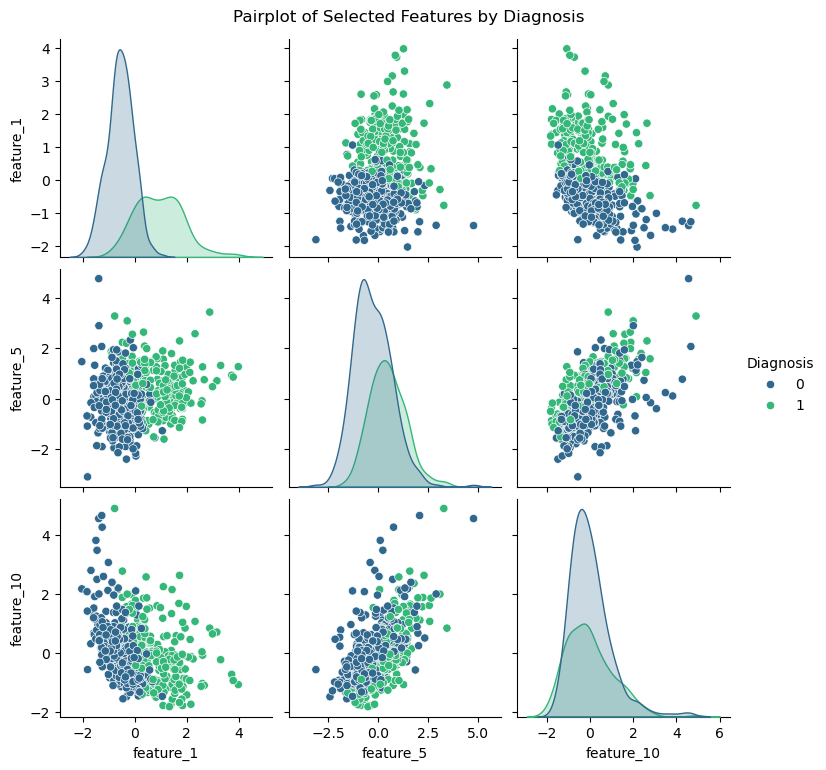

In [33]:

sns.pairplot(data_scaled, vars=["feature_1", "feature_5", "feature_10"], hue="Diagnosis", palette="viridis")
plt.suptitle("Pairplot of Selected Features by Diagnosis", y=1.02)
plt.show()


**Splitting of the dataset**

In [26]:
# Splitting the Dataset
X = data_scaled.drop("Diagnosis", axis=1)
y = data_scaled["Diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Implementing AdaBoost Classifier**

In [27]:
# Implementing AdaBoost Classifier
ada_model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
ada_model.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

**Model Evaluation**

In [28]:
# Model Evaluation
y_pred = ada_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

**Model Performance Metrics**

In [36]:
from tabulate import tabulate

# Model performance metrics
metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [accuracy, precision, recall, f1]
}

# Convert metrics dictionary into a DataFrame
metrics_df = pd.DataFrame(metrics)

# Display metrics table in a boxed format
print("\nModel Performance Metrics:")
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

# Display Confusion Matrix in a boxed format
conf_matrix_df = pd.DataFrame(conf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("\nConfusion Matrix:")
print(tabulate(conf_matrix_df, headers="keys", tablefmt="grid"))


Model Performance Metrics:
+----+-----------+----------+
|    | Metric    |    Score |
+====+===========+==========+
|  0 | Accuracy  | 0.973684 |
+----+-----------+----------+
|  1 | Precision | 0.97619  |
+----+-----------+----------+
|  2 | Recall    | 0.953488 |
+----+-----------+----------+
|  3 | F1 Score  | 0.964706 |
+----+-----------+----------+

Confusion Matrix:
+----------+---------------+---------------+
|          |   Predicted 0 |   Predicted 1 |
+==========+===============+===============+
| Actual 0 |            70 |             1 |
+----------+---------------+---------------+
| Actual 1 |             2 |            41 |
+----------+---------------+---------------+
